In [1]:
from PIL import Image as j
#import imagehash
from tkinter import *
import os, random
from Crypto.Cipher import AES
#from Crypto.Hash import SHA256
import numpy as np
import hashlib
import scipy.misc
#import cv2
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
import matplotlib.image as imge
#import base64
from numpy import zeros
from tkinter import filedialog
import numpy
import imageio
from skimage import img_as_ubyte
from timeit import Timer
import time

In [2]:
start = time.time()

#root = Tk()
#root.withdraw()
folder_selected = 'data'
print(folder_selected)
list=[]
l=os.listdir(folder_selected)

data


In [3]:
width = 500
height = 500
ext = ".png"
i=0
for image in l:
    if image.endswith('png') or image.endswith('jpg'):
        img1 = j.open(folder_selected+'/'+image).convert('L')
        img = img1.resize((width, height), j.ANTIALIAS)
        img.save("enc/inputs/input{}".format(i) + ext)
        i+=1

In [4]:
start = time.time()

folder_selected = "enc/inputs"
l=os.listdir(folder_selected)
images={}
i=0
width=0
height=0
for image in l:
    if image.endswith('png') or image.endswith('jpg'):
        img1 = io.imread(folder_selected+'/'+image, as_gray=True)
        height,width=img1.shape
        img1 = img_as_ubyte(img1)
        #imageio.imwrite('enc/inputs/input{}.png'.format(i),img1)
        images[i]=img1
        i+=1

In [5]:
#print(width,height)
start_enc = time.time()

new_image=zeros([height,width])
#print(new_image.shape)
for key in images:
    arr=images[key]
    #print(arr)
    for x in range(height):
        for y in range(width):
            new_image[x][y]=int(new_image[x][y]) ^int(arr[x][y] )
#new_image = img_as_ubyte(new_image)
imageio.imwrite('xored.png',new_image)
#plt.imshow(new_image)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [6]:
#img=j.open('xored.png').convert('L')
#hash = imagehash.average_hash(img)
filename="xored.png"

In [7]:
with open(filename,"rb") as f:
    bytes = f.read() # read entire file as bytes
    rhash = hashlib.sha256(bytes).hexdigest();

In [8]:
#print(hash)
key=str(rhash)
key=key[:16]

In [ ]:
filename = "xored.png"
filename_out = "enc/cipher_enc"
format = "png"

In [ ]:
def pad(data):
    return data + b"\x00"*(16-len(data)%16) 
    
def process_image(filename):
    # Opens image and converts it to RGB format for PIL
    im = j.open(filename)
    data = im.convert("L").tobytes() 
 
    # Since we will pad the data to satisfy AES's multiple-of-16 requirement, we will store the original data length and "unpad" it later.
    original = len(data) 
 
    # Encrypts using desired AES mode (we'll set it to ECB by default)
    #new = convert_to_RGB(aes_cbc_encrypt(key, pad(data))[:original]) 
    new=aes_cbc_encrypt(key, pad(data))[:original]
    # Create a new PIL Image object and save the old image data into the new image.
    im2 = j.new(im.mode, im.size)
    im2.putdata(new)
    #new_arr = img_as_ubyte(new_arr)
    #Save image
    im2.save(filename_out+"."+format, format)
    
def aes_cbc_encrypt(key, data, mode=AES.MODE_CBC):
    IV = "A"*16  #We'll manually set the initialization vector to simplify things
    aes = AES.new(key, mode, IV)
    new_data = aes.encrypt(data)
    return new_data

In [ ]:
process_image(filename)

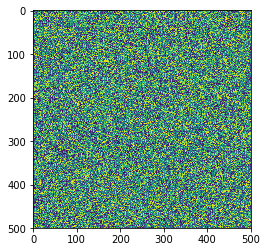

In [ ]:
enc_image = j.open("enc/cipher_enc.png")
plt.imshow(enc_image)
enc_image.mode
arr = np.asarray(enc_image)

In [ ]:
rows,col=arr.shape
new_arr=zeros([rows,col])
#print(rows,col)

In [ ]:
def ran(x,y,i,M,N,d1,d2):
    pix=arr[(x-d1*i)%M,(y-d2*i)%N]^arr[(x+d1*i)%M,(y+d2*i)%N]
    return pix

In [ ]:
n=len(images)
d1=(int(width)-1)//(2*n)
d2=(int(height)-1)//(2*n)
d1=random.randint(1,d1)
d2=random.randint(1,d2)
w=rows
h=col
for i in range(1,n+1):
    new_arr=np.ones([rows,col])
    for x in range(rows):
        for y in range(col):
            new_arr[x][y]=ran(x,y,i,w,h,d1,d2)
    #new_arr = img_as_ubyte(new_arr)
    imageio.imwrite('enc/rs/R{}.png'.format(i), new_arr)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [ ]:
def gen_share(no):
    for i in range(no):
        r1=j.open("enc/rs/R{}.png".format(i+1))
        arr_r1 = np.asarray(r1)
        if i==(n-1):
            r2=j.open("enc/rs/R1.png")
        else:
            r2=j.open("enc/rs/R{}.png".format(i+2))
        arr_r2 = np.asarray(r2)
        img=images[i]
        arr_i1 = np.asarray(img)
        share=zeros([rows,col])
        for x in range(rows):
            for y in range(col):
                share[x][y]=int(arr_i1[x][y])^int(arr_r1[x][y])^int(arr_r2[x][y])
        #share = img_as_ubyte(share)
        imageio.imwrite('enc/shares/share{}.png'.format(i), share)

In [ ]:
gen_share(n)
enc_enc = time.time()
print("time taken for encryption:{}".format(enc_enc-start_enc))

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [ ]:
start_dec = time.time()

dec_shares=n #int(input("enter the number of shares to be considered:"))

In [ ]:
def gen_decr(shares):
    for i in range(shares):
        r1=j.open("enc/shares/share0.png")
        rows,col=r1.size
        #print(rows,col)
        arr_r1 = np.asarray(r1)
        share=zeros([col,rows])
        for x in range(col):
            for y in range(rows):
                share[x][y]=arr_r1[x][y]*1
        for i in range(1,shares):
            r2=j.open("enc/shares/share{}.png".format(i))
            arr_r2 = np.asarray(r2)
            for x in range(col):
                for y in range(rows):
                    share[x][y]=int(share[x][y])^int(arr_r2[x][y])
    #share = img_as_ubyte(share)
    imageio.imwrite('dec/R_dec.png'.format(i),share)

In [ ]:
gen_decr(dec_shares)

In [ ]:
filename='R_dec.png'
#hash = imagehash.average_hash(img)
#dec_key=str(hash)
#print("dec hash key : ",dec_key)

with open(filename,"rb") as f:
    bytes = f.read() # read entire file as bytes
    dec_key = hashlib.sha256(bytes).hexdigest();
    print(dec_key)

In [ ]:
key=str(hash)#.encode('ascii')
key=key[:16]
filename = "R_dec.png"
filename_out = "dec/Rs_dec"
format = "png"
process_image(filename)

In [ ]:
enc_image = j.open("dec/Rs_dec.png")
plt.imshow(enc_image)
enc_image.mode

In [ ]:
for i in range(1,dec_shares+1):
    new_arr=np.ones([rows,col])
    for x in range(rows):
        for y in range(col):
            new_arr[x][y]=ran(x,y,i,w,h,d1,d2)
    #new_arr= img_as_ubyte(new_arr)
    imageio.imwrite('dec/rs/R{}.png'.format(i), new_arr)

In [ ]:
'''fig,ax = plt.subplots(n-2,n-2)
print("generated R's:\n")
filenames=['dec/rs/R{}.png'.format(i) for i in range(1,n+1)] #or glob or any other way to describe filenames
for i in range(n):
    with open(filenames[i],'rb') as f:
        image=j.open(f)
        ax[i%2][i//2].imshow(image)
fig.show()'''

In [ ]:
def im_dec(dec_shares):
    for k in range(dec_shares):
        r1=j.open("enc/shares/share{}.png".format(k))
        rows,col=r1.size
        #print(rows,col)
        arr_r1 = np.asarray(r1)
        share=zeros([col,rows])
        for x in range(col):
            for y in range(rows):
                share[x][y]=arr_r1[x][y]*1
        r2=j.open("dec/rs/R{}.png".format(k+1))
        arr_r2 = np.asarray(r2)
        if k==(dec_shares-1):
            r3=j.open("dec/rs/R1.png")
        else:
            r3=j.open("dec/rs/R{}.png".format(k+2))
        arr_r3 = np.asarray(r3)
        for x in range(col):
            for y in range(rows):
                share[x][y]=int(share[x][y])^int(arr_r2[x][y])^int(arr_r3[x][y])
        #share = img_as_ubyte(share)
        imageio.imwrite('dec/dec_img/input{}.png'.format(k),share)

In [ ]:
im_dec(dec_shares)
end_dec = time.time()
print("total time taken decryption:{} ".format(end_dec - start_dec))
end = time.time()
print("total time taken:{} ".format(end - start))

In [ ]:
'''from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2'''

In [ ]:
'''def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = measure.compare_ssim(imageA, imageB)

	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	plt.title("original")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	plt.title("decrypted")
	# show the images
	plt.show()
    # initialize the figure
	fig = plt.figure("Images")
	images = ("Original", original), ("decrypted", decrypted)'''

In [ ]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
'''for i in range(n):
    original = cv2.imread("enc/inputs/input{}.png".format(i))
    decrypted = cv2.imread("dec/dec_img/input{}.png".format(i))
 
# convert the images to grayscale
    original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    decrypted = cv2.cvtColor(decrypted, cv2.COLOR_BGR2GRAY)
    compare_images(original, decrypted, "Original vs. decrypted")'''

In [ ]:
img = cv2.imread('enc/shares/share0.png',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [ ]:
img = cv2.imread('enc/shares/share1.png',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [ ]:
img = cv2.imread('enc/shares/share2.png',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [ ]:
img = cv2.imread('enc/shares/share3.png',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [ ]:
img = cv2.imread('enc/shares/share4.png',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()